### Import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Read dataset
- This dataset shows the relationship between work experience (months) and monthly salary (thousand USD), intended for practicing linear regression in salary prediction.
https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset
- This dataset is used for heart disease prediction, combining clinical features such as age, gender, blood pressure, and cholesterol. I apply this non-linear dataset to demonstrate the limitations of linear regression.
https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum

In [10]:
df_salary = pd.read_csv("./Experience-Salary.csv")
df_heart = pd.read_csv("./Heart Prediction Quantum Dataset.csv")
print(df_salary.head())
print(df_heart.head())

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236
   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  


In [11]:
# Processing for Salary dataset
X_salary = df_salary['exp(in months)']  # Select column 'exp(in months)'
X_salary = X_salary.values.reshape(-1, 1)  # Convert to 2D array (single column), since sklearn requires X to be 2D
y_salary = df_salary['salary(in thousands)']  # Select column 'salary(in thousands)' as target

# Processing for Heart Prediction dataset
X_heart = df_heart['Age']  # Select column 'Age'
X_heart = X_heart.values.reshape(-1, 1)  # Convert to 2D array (single column), since sklearn requires X to be 2D
y_heart = df_heart['HeartRate']  # Select column 'HeartRate' as target

### Split the data into training and test sets


#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
x_train_salary, x_test_salary, y_train_salary, y_test_salary = train_test_split(
    X_salary, y_salary, test_size=0.2, random_state=18, shuffle=True)
x_train_heart, x_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=18, shuffle=True)

# train_test_split -> split the dataset into training and testing sets
# test_size=0.2 -> 80% for training and 20% for testing
# shuffle=True -> shuffle the data before splitting to ensure randomness

print("Training samples (salary):", len(x_train_salary))   # Number of samples in the training set
print("Test samples (salary):", len(x_test_salary))        # Number of samples in the test set
print("Training targets (salary):", y_train_salary)        # Target labels of the training set
print("Test target samples (salary):", len(y_test_salary)) # Number of target labels in the test set

print("Training samples (heart):", len(x_train_heart))     # Number of samples in the training set
print("Test samples (heart):", len(x_test_heart))          # Number of samples in the test set
print("Training targets (heart):", y_train_heart)          # Target labels of the training set
print("Test target samples (heart):", len(y_test_heart))   # Number of target labels in the test set


Training samples (salary): 800
Test samples (salary): 200
Training targets (salary): 616    41.300366
931    42.686482
768    26.680478
182    14.886378
722    35.924525
         ...    
702    35.409986
837    30.114015
120    23.638539
275    16.164102
298    32.613985
Name: salary(in thousands), Length: 800, dtype: float64
Test target samples (salary): 200
Training samples (heart): 400
Test samples (heart): 100
Training targets (heart): 105     71
50      88
222     71
94     114
330     90
      ... 
190    107
325     90
120    115
275    103
298     93
Name: HeartRate, Length: 400, dtype: int64
Test target samples (heart): 100


### Train a LinearRegression model

In [13]:
model_salary = LinearRegression()  # Initialize the Linear Regression model
model_salary.fit(x_train_salary, y_train_salary)  # Train the model with training data (x_train and y_train)

print("Intercept (salary):", model_salary.intercept_)  # Print the intercept of the model
print("Slope (salary):", model_salary.coef_)           # Print the slope (coefficient) of the model

model_heart = LinearRegression()  # Initialize the Linear Regression model
model_heart.fit(x_train_heart, y_train_heart)  # Train the model with training data (x_train and y_train)

print("Intercept (heart):", model_heart.intercept_)  # Print the intercept of the model
print("Slope (heart):", model_heart.coef_)           # Print the slope (coefficient) of the model


Intercept (salary): 4.677442204529605
Slope (salary): [0.8380941]
Intercept (heart): 85.5838955641823
Slope (heart): [0.05699488]


### Make predictions


In [14]:
y_pred_salary = model_salary.predict(x_test_salary)  
# Predict salary values from the test set (x_test) using the trained model
print("Predicted Salary:", y_pred_salary)  
# Print the predicted salary values from the linear regression model
print("Actual Salary (test data):", y_test_salary)  
# Print the actual salary values from the test set for comparison


y_pred_heart = model_heart.predict(x_test_heart)  
# Predict heart rate values from the test set (x_test) using the trained model
print("Predicted Heart Rate:", y_pred_heart)  
# Print the predicted heart rate values from the linear regression model
print("Actual Heart Rate (test data):", y_test_heart)  
# Print the actual heart rate values from the test set for comparison

Predicted Salary: [19.30161135 31.42722145 18.66856651 35.90614105 33.16222749 24.26954693
 24.04994278 26.45745562 24.18952525 24.38656784 27.87539861 24.91591895
 28.90076806 21.26625973 33.66218022 35.34696218 24.40153426 22.00766287
 32.44136461 30.81003457 32.00234554 27.0270818  18.44100643 20.59631027
 23.88680133 16.26852239 42.40168435 32.62719129 17.87570167 30.17857763
 25.46925357 31.35142854 30.12700989 20.49637979 22.23731376 18.57819686
 17.1732656  36.71685067 26.90822969 20.41463662 32.24925701 24.00288959
 24.92596183 28.67756703 17.11556698 19.39051696 21.0466213  22.26915787
 28.87746478 18.55288967 18.01070897 30.27148056 31.92303857 34.14496562
 25.02288837 26.11068607 20.02906626 25.6898292  29.17241052 41.86638732
 39.44174926 33.31675845 32.06802025 16.77405308 24.3559375  21.33853234
 24.82121943 25.56073532 20.38426244 32.35771293 24.21686449 19.02775563
 37.40849726 27.47269311 29.5861711  22.84604265 36.85390001 16.72893248
 24.60808005 33.73647568 16.62864

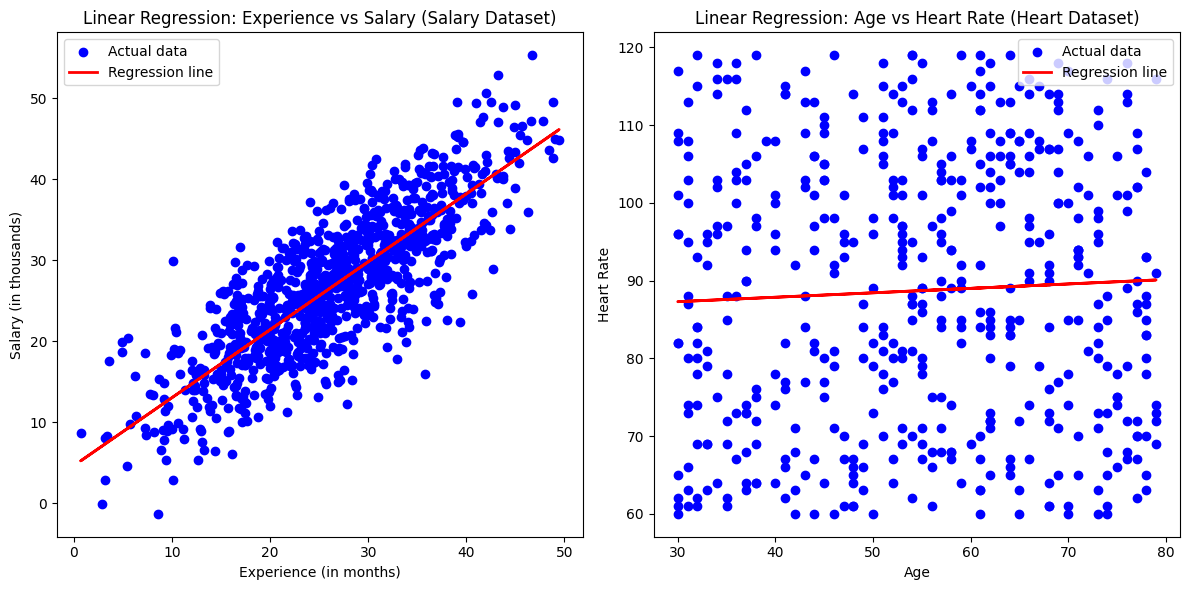

In [15]:
# Plot graphs for the salary dataset and the heart dataset side by side
plt.figure(figsize=(12, 6))  # Set the figure size (2 plots side by side)

# Plot for the salary dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(X_salary, y_salary, color='blue', label='Actual data')
plt.plot(X_salary, model_salary.predict(X_salary), color='red', linewidth=2, label='Regression line')
plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.title('Linear Regression: Experience vs Salary (Salary Dataset)')
plt.legend()

# Plot for the heart dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(X_heart, y_heart, color='blue', label='Actual data')
plt.plot(X_heart, model_heart.predict(X_heart), color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Linear Regression: Age vs Heart Rate (Heart Dataset)')
plt.legend()

# Show both plots side by side
plt.tight_layout()  # Adjust layout so plots don't overlap
plt.show()


In [16]:
mse_salary = mean_squared_error(y_test_salary, y_pred_salary)  # Calculate Mean Squared Error (MSE) between actual (y_test) and predicted (y_pred)
r2_salary = r2_score(y_test_salary, y_pred_salary)  # Calculate R² (Coefficient of Determination) to evaluate model fit

# Print MSE and R² rounded to 2 decimal places
print("Salary Dataset - Mean Squared Error:", round(mse_salary, 2))  
print("Salary Dataset - R² Score:", round(r2_salary, 2))  


mse_heart = mean_squared_error(y_test_heart, y_pred_heart)  # Calculate Mean Squared Error (MSE) between actual (y_test) and predicted (y_pred)
r2_heart = r2_score(y_test_heart, y_pred_heart)  # Calculate R² (Coefficient of Determination) to evaluate model fit

# Print MSE and R² rounded to 2 decimal places
print("Heart Dataset - Mean Squared Error:", round(mse_heart, 2))  
print("Heart Dataset - R² Score:", round(r2_heart, 2))  

Salary Dataset - Mean Squared Error: 22.9
Salary Dataset - R² Score: 0.63
Heart Dataset - Mean Squared Error: 331.24
Heart Dataset - R² Score: -0.01


1. Salary Dataset (Linear Data):
- The Mean Squared Error (MSE) is 22.9, which is relatively low.
- The R² score is 0.63, meaning the model explains about 63% of the variance in the salary data.
- This indicates that the linear regression model captures the relationship between work experience and salary reasonably well. Since this dataset is designed with a clear linear relationship (more experience → higher salary), linear regression is an appropriate choice and performs effectively.

2. Heart Dataset (Non-linear Data):
- The MSE is 331.24, which is very high compared to the salary dataset.
- The R² score is -0.01, which is worse than simply predicting the mean of the target variable.
- This clearly shows that linear regression fails to model the underlying relationship between age and heart rate. The dataset contains non-linear patterns (especially due to the added QuantumPatternFeature and the complex interaction of medical variables), which linear regression cannot capture.

--> The comparison demonstrates the strengths and weaknesses of linear regression. For linear datasets, it performs reasonably well and provides interpretable results. However, for non-linear datasets, the performance drops significantly, with high error and even negative R² values. This highlights the limitation of linear regression in handling complex, non-linear relationships and suggests the need for more advanced models (e.g., decision trees, ensemble methods, or neural networks) when working with such data.